In [ ]:
### 3.5 Bonus Question

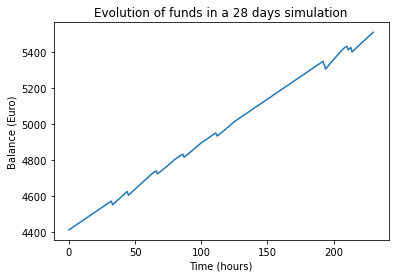

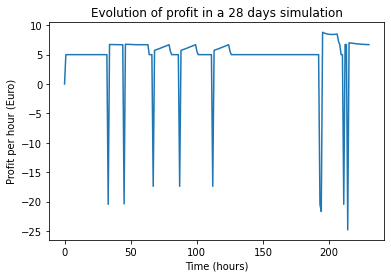

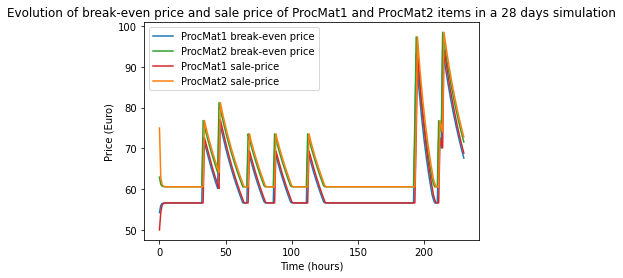

In [ ]:
PORT = 8000

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Make a request to create a new simulation
def init():
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example_sim4/T6'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to get the current funds available
def get_next_point():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

def get_next_point2():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/analytical_accounting_sim4'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Break-even cost of ProcMat1 : {jresponse['ProcMat1']}")
        print(f"Break-even cost of ProcMat2 : {jresponse['ProcMat2']}")
        return (jresponse['ProcMat1'],jresponse['ProcMat2'])
    else:
        return None

def get_next_point3():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/market_price'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Price of ProcMat1 : {jresponse[3]['unit_price']}")
        print(f"Price of ProcMat2 : {jresponse[4]['unit_price']}")
        return (jresponse[3]['unit_price'],jresponse[4]['unit_price'])
    else:
        return None
    
# List holding the x values
data_x = []
# List holding the y values
data_y = []

data_profit = []

data_price_ProcMat1 = []
data_price_ProcMat2 = []

data_BEC1 = []
data_BEC2 = []
i = 0
# Create sim
init()

for x in range(0, 231):
    next_step() # Do one step
    y = get_next_point() # Request a new random value and store in y
    
    BEC1, BEC2 = get_next_point2()
    Price1, Price2 = get_next_point3()
    
    if len(data_profit) > 0 : #no profit calculated at the first step
        profit = y - data_y[-1]
    else :
        profit = 0
    
    i+=1
    print(f" Step{i}")
    data_x.append(x)  # Add the current x to the list
    data_y.append(y) # Add the current y to the list
    data_profit.append(profit)
    
    data_BEC1.append(BEC1)
    data_BEC2.append(BEC2)
    
    data_price_ProcMat1.append(Price1)
    data_price_ProcMat2.append(Price2)
    
    clear_output(wait=True) # Clear / remove whatever was already plotted before
    
    # Implementation of the change in price to the break-even cost after every hour
    
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/set_market_sell_price_sim4'+'?ProcMat1_unit_price='+str(data_BEC1[-1])+'&&ProcMat2_unit_price='+str(data_BEC2[-1])
    data = {
        "ProcMat1_unit_price":data_BEC1[-1],
        "ProcMat2_unit_price":data_BEC2[-1]
    }
    requests.post(url, json=data)
        
    time.sleep(0.1) # Wait 0.1 seconds before the next request

plt.plot(data_x, data_y)
plt.xlabel('Time (hours)')
plt.ylabel('Balance (Euro)')
plt.title('Evolution of funds in a 28 days simulation')
plt.show()

plt.plot(data_x, data_profit)
plt.xlabel('Time (hours)')
plt.ylabel('Profit per hour (Euro)')
plt.title('Evolution of profit in a 28 days simulation')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data_x, data_BEC1, color='tab:blue')
ax.plot(data_x, data_BEC2, color='tab:green')
ax.plot(data_x, data_price_ProcMat1, color='tab:red')
ax.plot(data_x, data_price_ProcMat2, color='tab:orange')
plt.xlabel('Time (hours)')
plt.ylabel('Price (Euro)')
ax.legend(['ProcMat1 break-even price', 'ProcMat2 break-even price', 'ProcMat1 sale-price', 'ProcMat2 sale-price'])
plt.title('Evolution of break-even price and sale price of ProcMat1 and ProcMat2 items in a 28 days simulation')
plt.show()
